In [1]:
!pip install numpy pandas seaborn scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Pandas: (3, 1)
NumPy: 6
Matplotlib: [<matplotlib.lines.Line2D object at 0x000002A117D534A0>]
Seaborn: (244, 7)
Preprocessing: StandardScaler()
Train_test_split: [[[1, 2]], [[3, 4]], [1], [0]]
GridSearchCV: GridSearchCV(estimator=LogisticRegression(), param_grid={'C': [1, 10]})
LogisticRegression: LogisticRegression()
SVC: SVC()
DecisionTreeClassifier: DecisionTreeClassifier()
KNeighborsClassifier: KNeighborsClassifier()


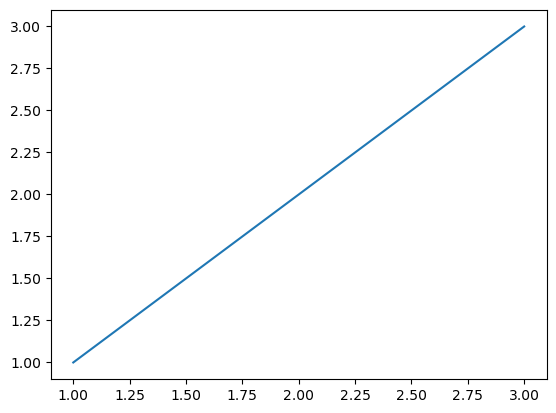

In [5]:
# Check pandas
try:
    print("Pandas:", pd.DataFrame([1,2,3]).shape)
except:
    print("Pandas import failed")

# Check numpy
try:
    print("NumPy:", np.array([1,2,3]).sum())
except:
    print("NumPy import failed")

# Check matplotlib
try:
    print("Matplotlib:", plt.plot([1,2,3], [1,2,3]))
except:
    print("Matplotlib import failed")

# Check seaborn
try:
    print("Seaborn:", sns.load_dataset("tips").shape)
except:
    print("Seaborn import failed")

# Check sklearn components
try:
    print("Preprocessing:", preprocessing.StandardScaler())
    print("Train_test_split:", train_test_split([[1,2],[3,4]], [1,0]))
    print("GridSearchCV:", GridSearchCV(LogisticRegression(), {'C': [1,10]}))
    print("LogisticRegression:", LogisticRegression())
    print("SVC:", SVC())
    print("DecisionTreeClassifier:", DecisionTreeClassifier())
    print("KNeighborsClassifier:", KNeighborsClassifier())
except Exception as e:
    print("Scikit-learn import failed:", str(e))

In [7]:
# Load the datasets
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# Display first few rows
print("Data with labels:")
display(data.head())
print("\nFeatures data:")
display(X.head())

Data with labels:


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0



Features data:


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [9]:
Y = data['Class'].to_numpy()
print("Shape of Y:", Y.shape)
print("First 10 values of Y:", Y[:10])

Shape of Y: (90,)
First 10 values of Y: [0 0 0 0 0 0 1 1 0 0]


In [11]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
print("First row after standardization:", X[0])

First row after standardization: [-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 -1.57589457e+00
 -9.73440458e-01 -1.05999788e-01 -1.05999788e-01 -6.54653671e-01
 -1.05999788e-01 -5.51677284e-01  3.44342023e+00 -1.85695338e-01
 -3.33333333e-01 -1.05999788e-01 -2.42535625e-01 -4.29197538e-01
  7.97724035e-01 -5.68796459e-01 -4.10890702e-01 -4.10890702e-01
 -1.50755672e-01 -7.97724035e-01 -1.50755672e-01 -3.92232270e-01
  9.43398113e+00 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01
 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
 -1.05999788e-01 -1.50755672e-01 -1.05999788e-01 -1.50755672e-01
 -1.50755672e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01 -1.50755

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (72, 83)
Test set shape: (18, 83)


In [15]:
parameters = {'C':[0.01,0.1,1], 'penalty':['l2'], 'solver':['lbfgs']}
lr = LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("Best parameters:", logreg_cv.best_params_)
print("Best accuracy:", logreg_cv.best_score_)

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy: 0.8464285714285713


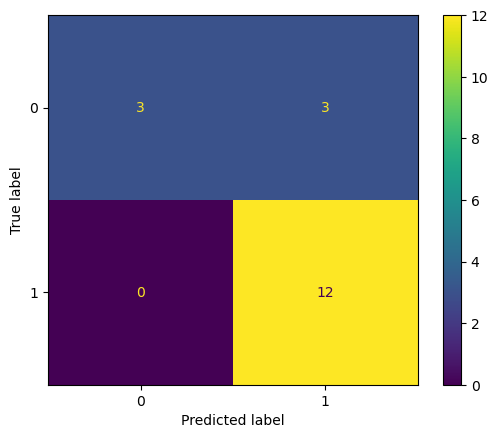

In [21]:


from sklearn.metrics import ConfusionMatrixDisplay

yhat = logreg_cv.predict(X_test)
ConfusionMatrixDisplay.from_estimator(logreg_cv, X_test, Y_test)

In [23]:
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("Best parameters:", svm_cv.best_params_)
print("Best accuracy:", svm_cv.best_score_)

Best parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best accuracy: 0.8482142857142856


Test accuracy: 0.8333333333333334


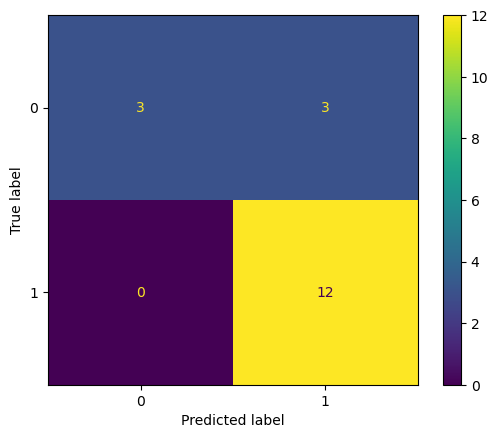

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

print("Test accuracy:", svm_cv.score(X_test, Y_test))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(svm_cv, X_test, Y_test)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['sqrt', 'log2'],  # ✅ Replaced 'auto' with 'log2'
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()

print("Fitting model...")
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)
print("Done fitting!")

print("Best parameters:", tree_cv.best_params_)
print("Best accuracy:", tree_cv.best_score_)

Fitting model...
Done fitting!
Best parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best accuracy: 0.8732142857142857


Test accuracy: 0.8333333333333334


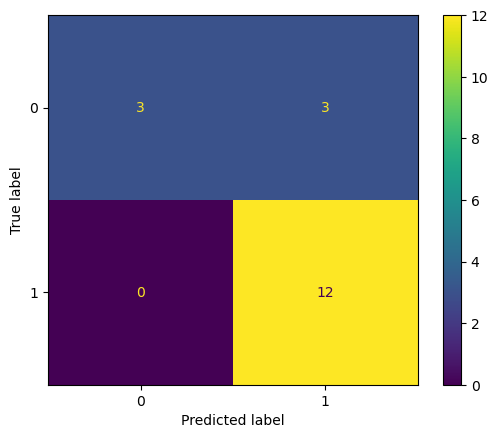

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Test accuracy:", tree_cv.score(X_test, Y_test))

# Modern confusion matrix plot
ConfusionMatrixDisplay.from_estimator(tree_cv, X_test, Y_test)
plt.show()

In [40]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'p': [1,2]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("Best parameters:", knn_cv.best_params_)
print("Best accuracy:", knn_cv.best_score_)

Best parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Best accuracy: 0.8482142857142858
